<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [6]:
import pandas as pd

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [ ]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [ ]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [ ]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [ ]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [8]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


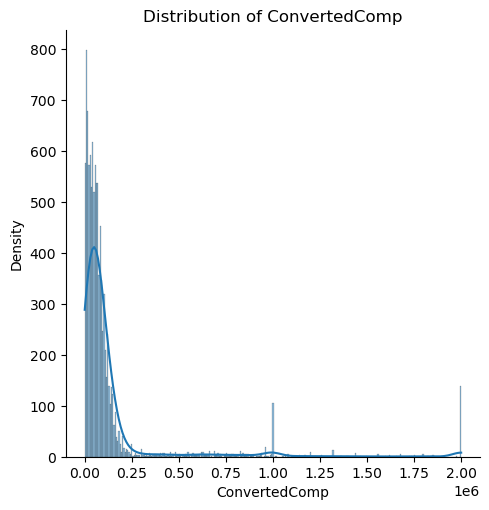

In [10]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(df['ConvertedComp'].dropna(), kde=True)
plt.title('Distribution of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.ylabel('Density')
plt.show()


Plot the histogram for the column `ConvertedComp`.


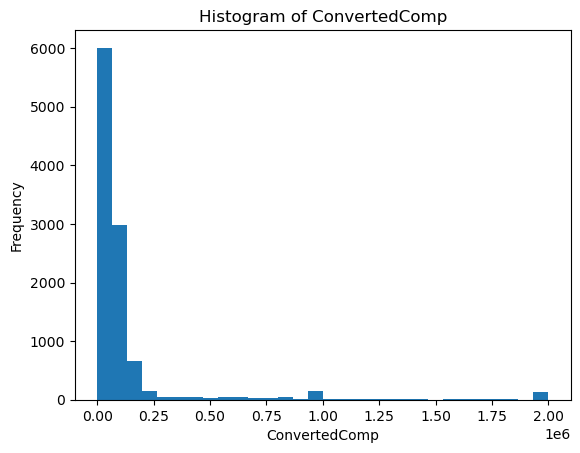

In [12]:
# your code goes here

plt.hist(df['ConvertedComp'].dropna(), bins=30)
plt.title('Histogram of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.ylabel('Frequency')
plt.show()


What is the median of the column `ConvertedComp`?


In [14]:
# your code goes here

median_convertedcomp = df['ConvertedComp'].median()
print(f"The median of ConvertedComp is: {median_convertedcomp}")


The median of ConvertedComp is: 57745.0


How many responders identified themselves only as a **Man**?


In [17]:
# your code goes here

man_responders = df[df['Gender'] == 'Man'].shape[0]
print(f"The number of responders who identified themselves as Man: {man_responders}")


The number of responders who identified themselves as Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [20]:
# your code goes here

median_convertedcomp_woman = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print(f"The median ConvertedComp for Women is: {median_convertedcomp_woman}")


The median ConvertedComp for Women is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [24]:
# your code goes here

five_number_summary_age = df['Age'].describe()
print(five_number_summary_age)


count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


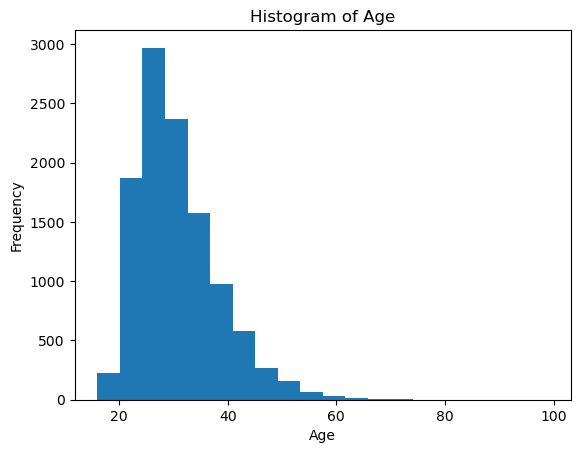

In [27]:
# your code goes here
# Plot histogram for Age
plt.hist(df['Age'].dropna(), bins=20)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


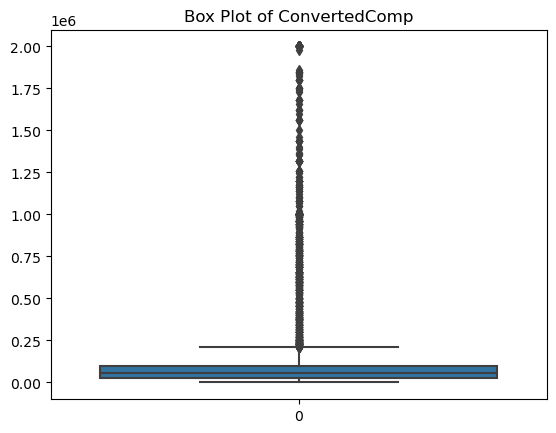

In [32]:
# your code goes here
# Boxplot for ConvertedComp
sns.boxplot(df['ConvertedComp'].dropna())
plt.title('Box Plot of ConvertedComp')
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [35]:
# your code goes here

Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print(f"The IQR for ConvertedComp is: {IQR}")


The IQR for ConvertedComp is: 73132.0


Find out the upper and lower bounds.


In [38]:
# your code goes here

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")


Lower bound: -82830.0
Upper bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [41]:
# your code goes here
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
num_outliers = outliers.shape[0]
print(f"The number of outliers in ConvertedComp: {num_outliers}")


The number of outliers in ConvertedComp: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [44]:
# your code goes here
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
print(f"New DataFrame shape after removing outliers: {df_no_outliers.shape}")


New DataFrame shape after removing outliers: (9703, 85)


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [48]:
# your code goes here
numeric_df = df.select_dtypes(include=[float, int])

correlation = numeric_df.corr()['Age']

print(correlation)


Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


In [51]:
median_age = df['Age'].median()
print(f"The median age of survey respondents is: {median_age}")


The median age of survey respondents is: 29.0


In [53]:
median_convertedcomp_woman = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print(f"The median ConvertedComp for respondents who identified as 'Woman' is: {median_convertedcomp_woman}")


The median ConvertedComp for respondents who identified as 'Woman' is: 57708.0


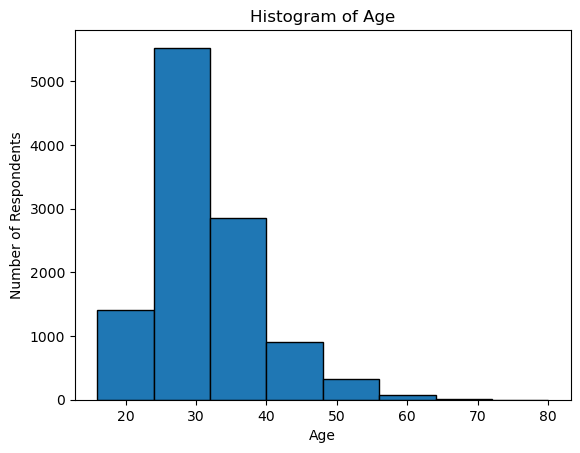

In [55]:
import matplotlib.pyplot as plt

# Plot histogram for Age
plt.hist(df['Age'].dropna(), bins=[16, 24, 32, 40, 48, 56, 64, 72, 80], edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.show()


In [57]:
# Calculate the IQR and identify the lower and upper bounds
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame without the outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Calculate the median after removing outliers
median_convertedcomp_after = df_no_outliers['ConvertedComp'].median()
print(f"The median ConvertedComp after removing outliers is: {median_convertedcomp_after}")


The median ConvertedComp after removing outliers is: 52704.0


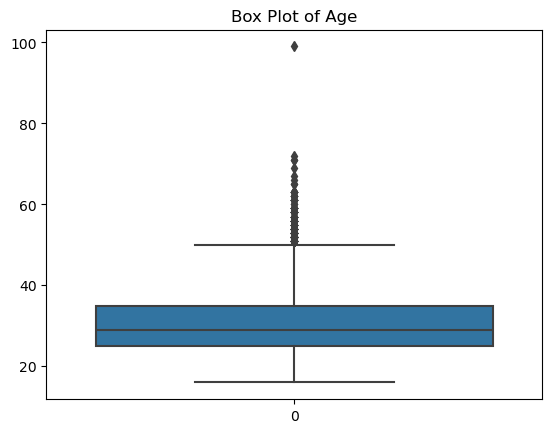

In [59]:
import seaborn as sns

# Create a boxplot for Age
sns.boxplot(df['Age'].dropna())
plt.title('Box Plot of Age')
plt.show()


In [61]:
mean_convertedcomp_after = df_no_outliers['ConvertedComp'].mean()
print(f"The mean ConvertedComp after removing outliers is: {mean_convertedcomp_after}")


The mean ConvertedComp after removing outliers is: 59883.20838915799


In [63]:
# Calculate the correlation of Age with all other numerical columns
correlation_with_age = df.corr()['Age'].sort_values(ascending=False)
print(correlation_with_age)


ValueError: could not convert string to float: 'I am a developer by profession'

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
